In [110]:
from math import *
import operator

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import parallel_coordinates

import seaborn as sns
sns.set(style="white", color_codes=True)

# package for random dataset gen
from numpy.random import rand
from numpy.random import seed

from scipy.stats import kendalltau

In [111]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2


In [112]:
location_iris = r"F:/EducationalData/Simplilearn/ML/Files/datasets/iris.csv"


In [113]:
df_iris = pd.read_csv(location_iris)


In [114]:
df_iris.shape

(150, 5)

In [115]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [116]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [117]:
# Now we can take a look at a summary of each attribute.

# This includes the count, mean, the min and max values as well as some 
# percentiles.
# similar ranges between 0 and 8 centimeters.
df_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [118]:
# describe select features
df_iris[["sepal_length", "sepal_width"]].describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [119]:
# Class Distribution
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [120]:
df_iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [121]:
df_iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Scatter plot

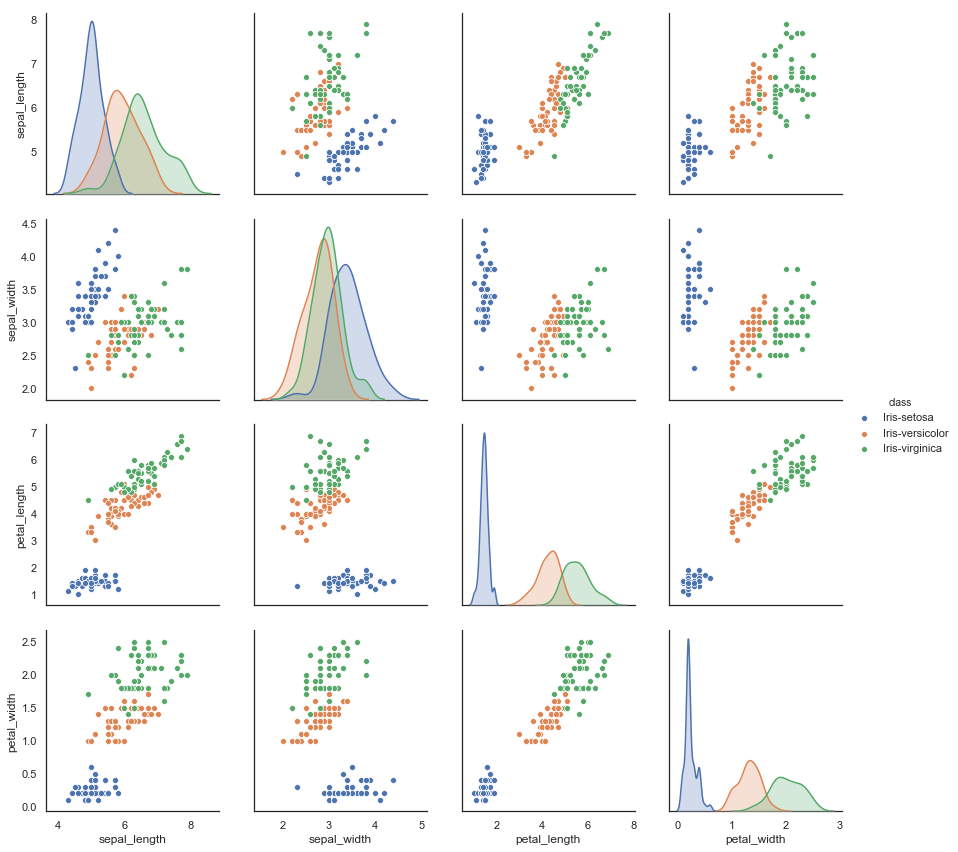

In [97]:
# seaborn plot is the pairplot, which shows the bivariate relation between 
# each # pair of features From the pairplot, 
# we'll see that the Iris-setosa species is separataed from the other two 
# across # all feature combinations 
sns.pairplot(df_iris, hue="class", size=3);

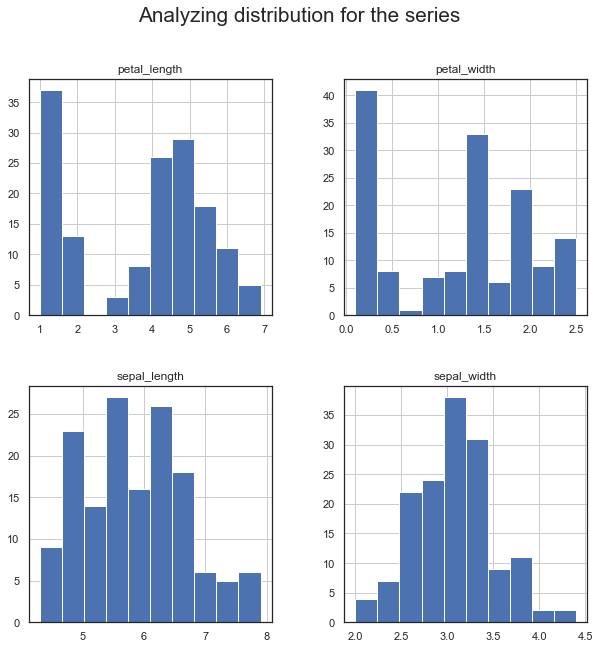

In [103]:

# data.hist calls data.plot
# pandas.DataFrame.plot() returns a matplotlib axis
df_iris.hist(
            column=["sepal_length", 
                    "sepal_width", 
                    "petal_length", 
                    "petal_width", 
                    "class"],
            figsize=(10, 10)
    #,sharey=True, sharex=True
)
plt.suptitle("Analyzing distribution for the series", fontsize="xx-large");

At first sight, Petal length and petal width seem to diverge from the normal distribution.

#### Compute __Kendall's tau__ coefficient between 2 arrays

In [138]:
x1 = [10, 5, 14, 0, 2]
x2 = [5, 2, 3, 7, 11]

tau, p_value = kendalltau(x1, x2)
print (tau)

-0.39999999999999997


In [139]:
import scipy
x = [5.05, 6.75, 3.21, 2.66]
y = [1.65, 26.5, -5.93, 7.96]
z = [1.65, 2.64, 2.64, 6.95]

print (kendalltau(x, y)[0])

print ((x, z)[0])

0.3333333333333334
[5.05, 6.75, 3.21, 2.66]


In [140]:
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

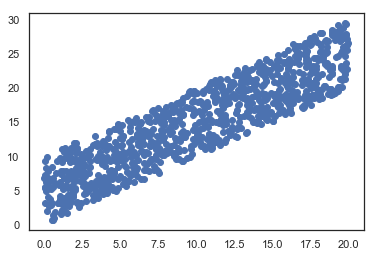

In [141]:
# plot
plt.scatter(data1, data2); 

uniform distribution and the positive association between the variables

In [142]:
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)

print('Kendall correlation coefficient: %.3f' % coef)
print('Kendall p-value: %.3f' % p)

Kendall correlation coefficient: 0.716
Kendall p-value: 0.000


Correlation coefficient is HIGH, so the variables are strongly correlated

In [143]:
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


#### kendall tau on Iris dataset

In [144]:
features_list1 = df_iris.columns.values

In [145]:
features_list1

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'class'], dtype=object)

In [146]:
features_list1 = np.delete(features_list1, 4)
features_list1


array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [147]:
features_list2 = features_list1

In [137]:
# Run kendall tau for each combination pair of the variables in the iris dataset
df_results = pd.DataFrame(columns=['Feature1', 'Feature2', 'Corr_Coeff', 'p_value'])
 
print('Feature 1'.ljust(15), 'Feature 2'.ljust(15), 'Corr Coeff'.ljust(15),'p-value'.ljust(15) )

row_ctr = 0

for feature1 in features_list1:

    features_list2 = np.delete(features_list2, np.where(features_list2 == feature1))
   
    for feature2 in features_list2:
        data1 = df_iris[feature1].values
        data2 = df_iris[feature2].values
        
        # calculate the kendall tau coeff
        coef, p = kendalltau(data1, data2)
        
        df_results.at[row_ctr, 'Feature1']   = feature1
        df_results.at[row_ctr, 'Feature2']   = feature2
        df_results.at[row_ctr, 'Corr_Coeff'] = coef
        df_results.at[row_ctr, 'p_value']    = p
        
        row_ctr = row_ctr + 1
        # print('{:15s}{:15s}{:15.6f}{:15.6f}'.format(feature1, feature2, coef, p))
        
df_results.sort_values(['p_value'], ascending=True)

Feature 1       Feature 2       Corr Coeff      p-value        


,Feature1,Feature2,Corr_Coeff,p_value
5,petal_length,petal_width,0.803014,5.44089e-44
1,sepal_length,petal_length,0.717624,1.43542e-36
2,sepal_length,petal_width,0.65496,8.55463e-30
3,sepal_width,petal_length,-0.182391,0.00159855
4,sepal_width,petal_width,-0.146988,0.012364
0,sepal_length,sepal_width,-0.0721119,0.21243


- if the p-value < 0.05 then REJECT the null hypothesis that the features have no impact on each other, in fact the features are co-related.
- verify the results with visual plots or CORR method

C:\Users\Satnam\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


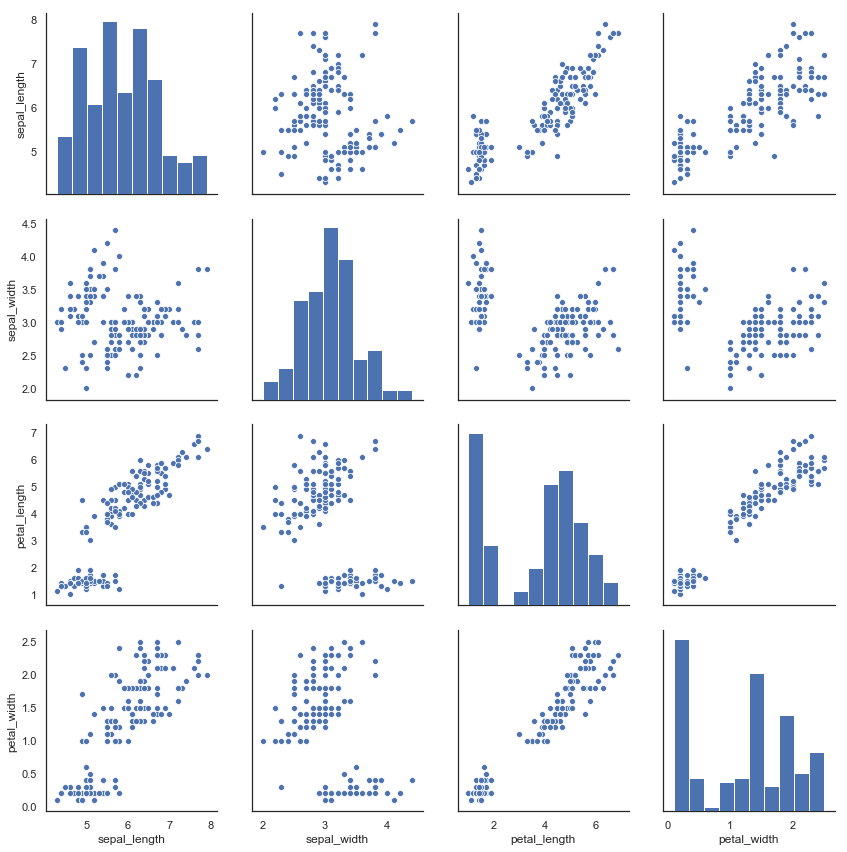

In [132]:
sns.pairplot(df_iris, size=3);